# Simple GP Regression 

Gaussian processes are a powerful tool for nonlinear regression models. 

Assume that we have **predictor** variables $\mathbf{X} = \{\mathbf{x_i}\}_{i=1}^N \in \mathbb{R}^d$ and **response** variables $\mathbf{y}=\{y_i \in \mathbb{R}\}_{i=1}^N$.

The response variables $\mathbf{y}$ are assumed to dependent on the predictors $\mathbf{X}$,

\begin{equation}
y_i \sim \mathcal{N}(f(\mathbf{x}_i),\sigma^2), \ i=1,\ldots,n,  
\end{equation}

where $f$ is a mapping function. Treating $f$ as a random function, we assume that the distribution over $f$ is a **Gaussian process**,
$$
f \sim \mathcal{GP}(m(\mathbf{x}),k(\mathbf{x},\mathbf{x}')),
$$
where $m(\cdot)$ and $k(\cdot,\cdot)$ are the mean and kernel functions respectively.

## 1D regression example

We start by simulating some data

In [1]:
using GaussianProcesses

srand(20140430)
# Training data
n=10;                          #number of training points
x = 2π * rand(n);              #predictors
y = sin.(x) + 0.05*randn(n);    #regressors

The first step in modelling with Gaussian Processes is to choose mean functions and kernels which describe the process. 

**Note** that all hyperparameters for the **mean** and **kernel** functions and $\sigma$ are given on the log scale. This is true for all strictly positive hyperparameters. Gaussian Processes are represented by objects of type 'GP' and constructed from observation data, a mean function and kernel, and optionally the amount of observation noise.

In [2]:
#Select mean and covariance function
mZero = MeanZero()                   #Zero mean function
kern = SE(0.0,0.0)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

logObsNoise = -1.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)       #Fit the GP

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: GaussianProcesses.MeanZero, Params: Float64[]
  Kernel:
    Type: GaussianProcesses.SEIso, Params: [0.0, 0.0]
  Input observations = 
[4.85461 5.17653 … 1.99412 3.45676]
  Output observations = [-0.967293, -1.00705, -1.0904, 0.881121, -0.333213, -0.976965, 0.915934, 0.736218, 0.950849, -0.306432]
  Variance of observation noise = 0.1353352832366127
  Marginal Log-Likelihood = -6.335

Once we've fit the `GP` function to the data, we can calculate the **predicted mean** and **variance** of of the function at unobserved points $\{\mathbf{x}^\ast,y^\ast\}$, conditional on the observed data $\mathcal{D}=\{\mathbf{y},\mathbf{X}\}$. This is done with the `predict_y` function.

The `predict_y` function returns the mean vector $\mu(\mathbf{x}^\ast)$ and covariance matrix (variance vector if `full_cov=false`) $\Sigma(\mathbf{x}^\ast,\mathbf{x}^{\ast^\top})$ of the predictive distribution,
\begin{equation}
    y^\ast|\mathbf{x}^\ast,\mathcal{D} \sim \mathcal{N}(\mu(\mathbf{x}^\ast),\Sigma(\mathbf{x}^\ast,\mathbf{x}^{\ast^\top})+\sigma^2\mathbf{I}),
\end{equation}
where 
\begin{eqnarray}
\mu(\mathbf{x}^\ast) &=& k(\mathbf{x}^\ast,\mathbf{X})(k(\mathbf{X}, \mathbf{X}) + \sigma_n^2 \mathbf{I})^{-1}\mathbf{y} \\ \ \mbox{and} \
\Sigma(\mathbf{x}^\ast,\mathbf{x}^{\ast}) &=& k(\mathbf{x}^\ast,\mathbf{x}^\ast) -k(\mathbf{x}^\ast,\mathbf{X})(k(\mathbf{X}, \mathbf{X})+ \sigma_n^2 \mathbf{I})^{-1} k(\mathbf{X},\mathbf{x}^\ast).
\end{eqnarray}

**Note** you can use the `predict_f` function to predict the latent function $\mathbf{f}^\ast$.

In [3]:
μ, σ² = predict_y(gp,linspace(0,2π,100));

Plotting GPs is straightforward and utilises the recipes approach to plotting from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package. More information about plotting GPs and the available functionality can be found in this [notebook](https://github.com/STOR-i/GaussianProcesses.jl/blob/master/notebooks/Plotting%20GPs.ipynb).

The default plot function `plot(gp)` outputs the predicted mean and variance of the function (i.e. uses `predict_f` in the background), with the uncertainty in the function represented by a confidence ribbon (set to 95% by default). All optional plotting arguments are given after `;`.


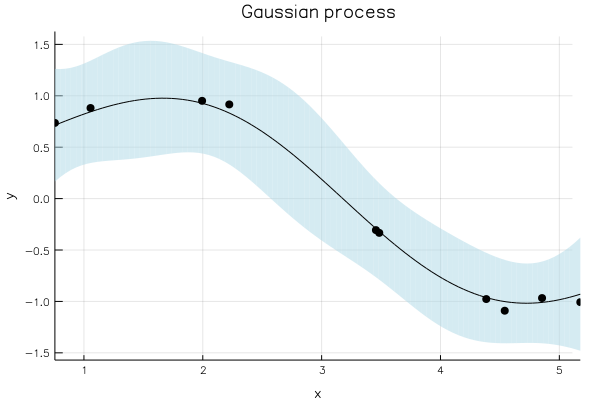

In [4]:
using Plots  #Load Plots.jl package

plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

The hyperparameters are optimized using the [Optim.jl](https://github.com/JuliaOpt/Optim.jl) package. This offers users a range of optimization algorithms which can be applied to estimate the hyperparameters using type II maximum likelihood estimation. Gradients are available for all mean and kernel functions used in the package and therefore it is recommended that the user utilizes gradient based optimization techniques. As a default, the `optimize!` function uses the `L-BFGS` solver, however, alternative solvers can be applied. 

In [5]:
optimize!(gp; method=Optim.BFGS())   # Optimise the hyperparameters

Dict(:mean=>true,:kern=>true,:noise=>true)


Results of Optimization Algorithm
 * Algorithm: BFGS
 * Starting Point: [-1.0,0.0,0.0]
 * Minimizer: [-2.99484893977448,0.4636861184637202, ...]
 * Minimum: -3.275745e+00
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: true
   * |g(x)| < 1.0e-08: true
   * f(x) > f(x'): false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 42
 * Gradient Calls: 42

In [6]:
plot(gp)   #Plot the GP after the hyperparameters have been optimised 

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 -1.0 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1 
 
 
 
 
 y2

MCMC can be run on the GPE hyperparameters through the `mcmc` function. Priors for hyperparameters of the mean and kernel parameters can be set through the `set_priors!` function. The log noise parameter of the GPE is a Uniform(0,1) distribution and currently can't be changed.

In [7]:
using Distributions

set_priors!(kern, [Normal(), Normal()]) # Uniform(0,1) distribution assumed by default if priors not specified
chain = mcmc(gp)
plot(chain', label=["Noise", "SE log length", "SE log scale"])

BasicMCJob:
  Variable [1]: p (BasicContMuvParameter)
  GenericModel: 1 variables, 0 dependencies (directed graph)
  HMC sampler: number of leaps = 10, leap step = 0.1
  VanillaMCTuner: period = 100, verbose = false
  BasicMCRange: number of steps = 1000, burnin = 0, thinning = 1

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 200 
 
 
 400 
 
 
 600 
 
 
 800 
 
 
 1000 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip6702)" style="stroke:#e26f46; stroke-width:1; stroke-o

## Multi-dimensional regression

The regression example above can be easily extended to higher dimensions. For the purpose of visualisation, and without loss of generality, we consider a 2 dimensional regression example.

In [8]:
#Training data
d, n = 2, 50;         #Dimension and number of observations
x = 2π * rand(d, n);                               #Predictors
y = vec(sin.(x[1,:]).*sin.(x[2,:])) + 0.05*rand(n);  #Responses

For problems of dimension>1 we can use isotropic (`Iso`) kernels or automatic relevance determination (`ARD`) kernels. For `Iso` kernels, the length scale parameter $\ell$ is the same for all dimensions. For `ARD` kernels, each dimension has different length scale parameter.

The `Iso` and `ARD` kernels are implemented automatically by replacing the single length scale parameter with a vector of parameters. For example, below we use the Matern 5/2 `ARD` kernel, if we wanted to use the `Iso` alternative then we would set the kernel as `kern=Mat(5/2,0.0,0.0)`.

In this example we use a composite kernel represented as the sum of a Matern 5/2 ARD kernel and a Squared Exponential isotropic kernel. This is easily implemented using the `+` symbol, or in the case of a product kernel, using the `*` symbol (i.e. `kern = Mat(5/2,[0.0,0.0],0.0) * SE(0.0,0.0)`).

In [9]:
mZero = MeanZero()                             # Zero mean function
kern = Matern(5/2,[0.0,0.0],0.0) + SE(0.0,0.0)    # Sum kernel with Matern 5/2 ARD kernel 
                                               # with parameters [log(ℓ₁), log(ℓ₂)] = [0,0] and log(σ) = 0
                                               # and Squared Exponential Iso kernel with
                                               # parameters log(ℓ) = 0 and log(σ) = 0

Type: GaussianProcesses.SumKernel
  Type: GaussianProcesses.Mat52Ard, Params: [-0.0, -0.0, 0.0]
  Type: GaussianProcesses.SEIso, Params: [0.0, 0.0]


Fit the Gaussian process to the data using the prespecfied mean and covariance functions.

In [10]:
gp = GP(x,y,mZero,kern,-2.0)          # Fit the GP

GP Exact object:
  Dim = 2
  Number of observations = 50
  Mean function:
    Type: GaussianProcesses.MeanZero, Params: Float64[]
  Kernel:
    Type: GaussianProcesses.SumKernel
      Type: GaussianProcesses.Mat52Ard, Params: [-0.0, -0.0, 0.0]
      Type: GaussianProcesses.SEIso, Params: [0.0, 0.0]
  Input observations = 
[2.4074 4.74658 … 5.90308 3.64732; 1.10184 1.46959 … 1.66664 0.937862]
  Output observations = [0.634667, -0.965483, 0.823632, 0.0182852, 0.63505, 0.469851, -0.923228, -0.254079, -0.585157, 0.0903145  …  -0.250312, 0.278147, 0.396072, -0.26436, 0.943786, 0.84831, -0.691183, 0.51154, -0.323054, -0.343967]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -24.734

Using the [Optim](https://github.com/JuliaOpt/Optim.jl) package we have the option to choose from a range of optimize functions including conjugate gradients. It is also possible to fix the hyperparameters in either the mean function, kernel function or observation noise, by settting them to false in `optimize!` (e.g. `optimize!(...,mean=false)`).

In [11]:
optimize!(gp)                         # Optimize the hyperparameters

Dict(:mean=>true,:kern=>true,:noise=>true)


Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [-2.0,-0.0,-0.0,0.0,0.0,0.0]
 * Minimizer: [-4.280711367180729,1.8511934768970428, ...]
 * Minimum: -5.508004e+01
 * Iterations: 39
 * Convergence: false
   * |x - x'| < 1.0e-32: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-32: false
   * |g(x)| < 1.0e-08: false
   * f(x) > f(x'): true
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 160
 * Gradient Calls: 160

A range of plotting options are availbe through the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package.

In [12]:
plot(contour(gp) ,heatmap(gp))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 6 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 4 
 
 
 5 
 
 
 6 
 
 
<polyline clip-path="url(#clip6902)" style="stroke:#f57d15; stroke-width:1; stroke-opacity:1; fill:none" points="
 22.3377,338.677 24.7104,346.099 26.378,350.085 28.0696,353.528 30.4184,357.379 33.1154,360.956 34.4587,362.459 38.4991,366.076 41.925,368.385 42.5394,368.754 
 46.5798,370.615 50.6201,371.898 54.6605,372.679 58.7008,373.002 62.7412,372.88 66.7815,372.302 70.8219,371.222 74.8623,369.551 76.8855,368.385 78.9026,367.069 
 82.943,363.464 85.0339,360.956 86.9833,358.117 89.4094,353.528 91.0237,349.588 92.1865,346.099 94.0577,338.67 95.064,333.156 95.3675,331.242 96.2345,323.813 
 96.8003,316.384 97.1087,308.956 97.1805,301.527 97.0174,294.099 96.6027,286.67 95.8987,279.241 95.064,273.316 94.8238,271.813 93.1949,264.384 91.0237,257.378 
 90.8654,256.956 87.2262,249.527 86.9833,249.137 82.943,243.998 80.9249,242.098 78.9026,240.485 74.8623,238.088 70.8219,236.419 66.7815,235.329 62.7412,234.726 
 61.4133,234.67 58.7008,234.562 56.7692,234.67 54.6605,234.795 50.6201,235.446 46.5798,236.536 42.5394,238.122 38.4991,240.303 35.9439,242.098 34.4587,243.332 
 30.4184,247.616 28.9802,249.527 26.378,253.923 24.9011,256.956 22.3377,264.095 
 "/>
<polyline clip-path="url(#clip6902)" style="stroke:#e65e2d; stroke-width:1; stroke-opacity:1; fill:none" points="
 22.3377,240.227 26.378,235.622 27.4362,234.67 30.4184,232.46 34.4587,230.158 38.4991,228.424 42.1471,227.241 42.5394,227.127 46.5798,226.212 50.6201,225.578 
 54.6605,225.197 58.7008,225.059 62.7412,225.165 66.7815,225.534 70.8219,226.199 74.8623,227.218 74.9296,227.241 78.9026,228.741 82.943,230.882 86.9833,233.896 
 87.791,234.67 91.0237,238.452 93.3287,242.098 95.064,245.668 96.5519,249.527 98.6364,256.956 99.1044,259.202 100.033,264.384 100.996,271.813 101.664,279.241 
 102.108,286.67 102.37,294.099 102.477,301.527 102.441,308.956 102.262,316.384 101.928,323.813 101.415,331.242 100.678,338.67 99.6388,346.099 99.1044,349.009 
 98.1217,353.528 95.8823,360.956 95.064,363.016 92.3025,368.385 91.0237,370.312 86.9833,374.825 85.7878,375.813 
 "/>
<polyline clip-path="url(#clip6902)" style="stroke:#d24742; stroke-width:1; stroke-opacity:1; fill:none" points="
 101.625,375.813 103.145,371.059 103.788,368.385 105.064,360.956 105.896,353.528 106.466,346.099 106.866,338.67 107.148,331.242 107.185,329.876 107.339,323.813 
 107.462,316.384 107.524,308.956 107.528,301.527 107.473,294.099 107.349,286.67 107.185,280.681 107.143,279.241 106.827,271.813 106.368,264.384 105.705,256.956 
 104.738,249.527 103.279,242.098 103.145,241.573 100.879,234.67 99.1044,231.035 96.5046,227.241 95.064,225.651 91.0237,222.422 86.9833,220.27 85.8407,219.812 
 82.943,218.797 78.9026,217.759 74.8623,217.021 70.8219,216.511 66.7815,216.18 62.7412,215.997 58.7008,215.944 54.6605,216.008 50.6201,216.183 46.5798,216.47 
 42.5394,216.873 38.4991,217.405 34.4587,218.09 30.4184,218.966 27.306,219.812 26.378,220.108 22.3377,221.666 
 "/>
<polyline clip-path="url(#clip6902)" style="stroke:#ba3655; stroke-width:1; stroke-opacity:1; fill:none" points="
 22.3377,204.905 22.5618,204.955 26.378,205.707 30.4184,206.224 34.4587,206.555 38.4991,206.764 42.5394,206.89 46.5798,206.961 50.6201,206.995 54.6605,207.007 
 58.7008,207.007 62.7412,207.004 66.7815,207.004 70.8219,207.013 74.8623,207.036 78.9026,207.077 82.943,207.144 86.9833,207.243 91.0237,207.387 95.064,207.599 
 99.1044,207.928 103.145,208.504 107.185,209.801 109.9,212.384 111.225,216.365 111.729,219.812 112.2,227.241 112.39,234.67 112.475,242.098 112.509,249.527 
 112.515,256.956 112.507,264.384 112.493,271.813 112.477,279.241 112.465,286.67 112.462,294.099 112.47,301.527 112.495,308.956 112.539,316.384 112.61,323.813 
 112.712,331.242 112.855,338.67 113.051,346.099 113.319,353.528 113.691,360.956 114.227,368.385 115.053,375.813 
 "/>
<polyli